In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [3]:
#Carregando dataset
data = pd.read_excel("hoteis_tratados.xlsx")
data.columns = data.columns.str.lower()
data

,data_avaliacao,titulo,comentario_positivo,comentario_negativo,nota,hotel
0,2025-02-17,bom,A localização é perfeita e os funcionários são...,Da área de lazer que é pequena e sem uma vista...,10.0,Atlante_Plaza
1,2025-03-30,Pretenso vir oitras vezes,Atrndimento e conforto,Estacionamento pago,10.0,Atlante_Plaza
2,2025-03-29,Excepcional,"Foi excelente!! Tudo muito bom, os funcionário...",NaN,10.0,Atlante_Plaza
3,2025-03-29,Quero voltar!,"Funcionários bem treinados. Agradecemos, espec...",NaN,9.0,Atlante_Plaza
4,2025-03-27,Incrível,Excelente,NaN,10.0,Atlante_Plaza
...,...,...,...,...,...,...
72439,2024-12-28,Excepcional,NaN,NaN,10.0,Vela_Branca
72440,2024-08-14,Aceitável,NaN,NaN,5.0,Vela_Branca
72441,2024-04-12,Aceitável,NaN,NaN,5.0,Vela_Branca
72442,2024-03-26,Excepcional,NaN,NaN,10.0,Vela_Branca


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72444 entries, 0 to 72443
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_avaliacao       72444 non-null  datetime64[ns]
 1   titulo               72444 non-null  object        
 2   comentario_positivo  34665 non-null  object        
 3   comentario_negativo  29024 non-null  object        
 4   nota                 72444 non-null  float64       
 5   hotel                72444 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.3+ MB


In [5]:
data['nota'].unique()


array([10. ,  9. ,  7. ,  8. ,  5. ,  4. ,  6. ,  3. ,  1. ,  2. ,  5.8,
        8.3,  6.3,  6.7,  9.2,  9.6])

In [6]:
data['nota'].nunique()


16

C:\Users\TERRA\AppData\Local\Temp\ipykernel_19812\1787070358.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nota_hotel, x='nota', y='hotel', palette='viridis')


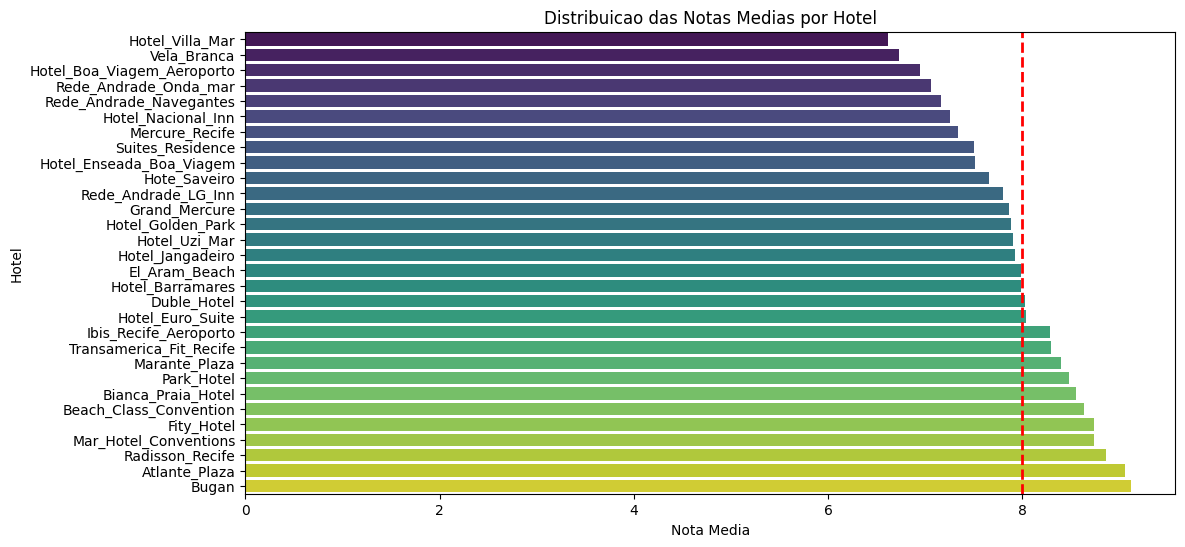

In [7]:
# Nota media por hotel
nota_hotel = data.groupby('hotel')['nota'].mean().sort_values().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=nota_hotel, x='nota', y='hotel', palette='viridis')
plt.axvline(x=8, color='red', linestyle='--', linewidth=2)
plt.title('Distribuicao das Notas Medias por Hotel')
plt.xlabel('Nota Media')
plt.ylabel('Hotel')
plt.show()

# Comentário:
- A maioria dos hotéis avaliados apresenta nota média abaixo de 8, evidenciado pela linha vermelha.
- Poucos se destacam acima de 8.5, o que pode indicar oportunidades de melhoria generalizadas no setor.

C:\Users\TERRA\AppData\Local\Temp\ipykernel_19812\1703895909.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=melhores.reset_index(), x='nota_media', y='hotel', palette='crest')


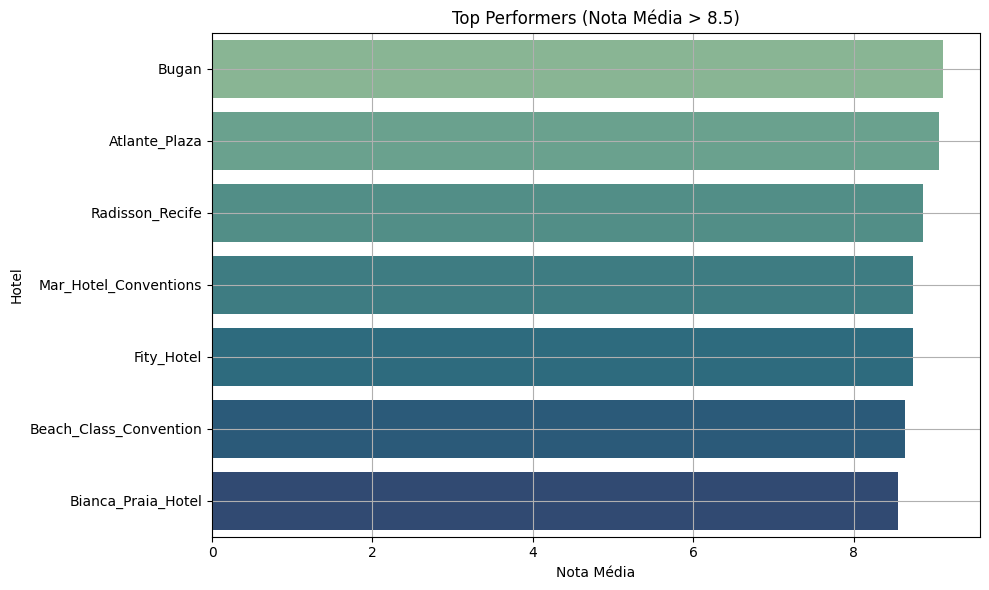

Métricas dos Top Performers:
                        nota_media  qtd_positivos  qtd_negativos  \
hotel                                                              
Bugan                     9.117684            762            570   
Atlante_Plaza             9.059781           1392            951   
Radisson_Recife           8.859773            835            642   
Mar_Hotel_Conventions     8.741433            854            687   
Fity_Hotel                8.740330           1431           1036   
Beach_Class_Convention    8.636283           1448           1224   
Bianca_Praia_Hotel        8.553427           2021           1500   

                        percentual_negativo  comentarios_por_nota  
hotel                                                              
Bugan                              0.427928             83.573855  
Atlante_Plaza                      0.405890            153.646098  
Radisson_Recife                    0.434665             94.246210  
Mar_Hotel_Conventi

In [21]:
# Cálculo de métricas por hotel
grouped = data.groupby('hotel')
df = grouped.agg({
    'nota': 'mean',
    'comentario_positivo': lambda x: x.dropna().count(),
    'comentario_negativo': lambda x: x.dropna().count()
}).rename(columns={
    'nota': 'nota_media',
    'comentario_positivo': 'qtd_positivos',
    'comentario_negativo': 'qtd_negativos'
})

df['total_comentarios'] = df['qtd_positivos'] + df['qtd_negativos']
df['percentual_negativo'] = df['qtd_negativos'] / df['total_comentarios']
df['comentarios_por_nota'] = df['qtd_positivos'] / df['nota_media']

# Top performers
melhores = df[df['nota_media'] > 8.5].sort_values(by='nota_media', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=melhores.reset_index(), x='nota_media', y='hotel', palette='crest')
plt.title('Top Performers (Nota Média > 8.5)')
plt.xlabel('Nota Média')
plt.ylabel('Hotel')
plt.grid(True)
plt.tight_layout()
plt.show()

# Exibir principais métricas
print("Métricas dos Top Performers:")
print(melhores[['nota_media', 'qtd_positivos', 'qtd_negativos', 'percentual_negativo', 'comentarios_por_nota']])


In [19]:
# Lista dos melhores hotéis (top performers)
top_performers = nota_hotel[nota_hotel['nota'] > 8.5]
print("\nTop performers (nota > 8.5):")
print(top_performers)



Top performers (nota > 8.5):
                     hotel      nota
23      Bianca_Praia_Hotel  8.553427
24  Beach_Class_Convention  8.636283
25              Fity_Hotel  8.740330
26   Mar_Hotel_Conventions  8.741433
27         Radisson_Recife  8.859773
28           Atlante_Plaza  9.059781
29                   Bugan  9.117684


In [8]:
# Quantos hoteis estao abaixo da nota 8?
hoteis_baixa_nota = nota_hotel[nota_hotel['nota'] < 8]
porcentagem_baixa_nota = (hoteis_baixa_nota.shape[0] / nota_hotel.shape[0]) * 100
print(f"{porcentagem_baixa_nota:.2f}% dos hoteis possuem nota media abaixo de 8.\n")

56.67% dos hoteis possuem nota media abaixo de 8.



"Apesar da nota ser em uma escala de 0 a 10, mais de X% dos hotéis avaliados apresentam desempenho abaixo de 8, o que pode indicar uma experiência apenas satisfatória para a maioria dos hóspedes."

C:\Users\TERRA\AppData\Local\Temp\ipykernel_19812\3018676482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comentario_hotel, x='comentario_positivo', y='hotel', palette='viridis')


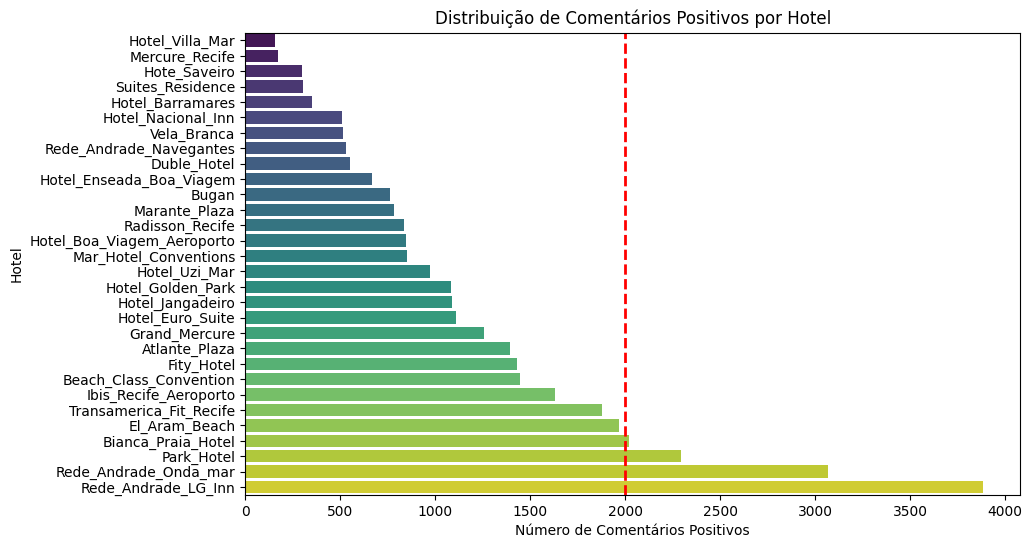

In [10]:
comentario_hotel = data.groupby('hotel')['comentario_positivo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=comentario_hotel, x='comentario_positivo', y='hotel', palette='viridis')
plt.axvline(x=2000, color='red', linestyle='--', linewidth=2)
plt.title('Distribuição de Comentários Positivos por Hotel')
plt.xlabel('Número de Comentários Positivos')
plt.ylabel('Hotel')
plt.show()

# Linha vertical vermelha, pontilhada, na posição x = 2000
# analise o fato de que poucos foram os hoteis que obtiveram mais de 2000 comentarios positivos
# e que a maioria dos hoteis tem menos de 2000 comentarios positivos

# depois tente fazer uma correlaçõa entre QUANTIDADE DE COMENTARIOS e NOTA MEDIA para ver se existe 
# uma correlação entre o fato de ter uma nota média maior estimula mais comentários positivos



# Comentário:
- Poucos hotéis concentram a maioria dos comentários positivos, o que pode refletir maior volume de hóspedes ou presença online mais forte.


C:\Users\TERRA\AppData\Local\Temp\ipykernel_19812\2540667949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negativo_hotel, x='comentario_negativo', y='hotel', palette='viridis')


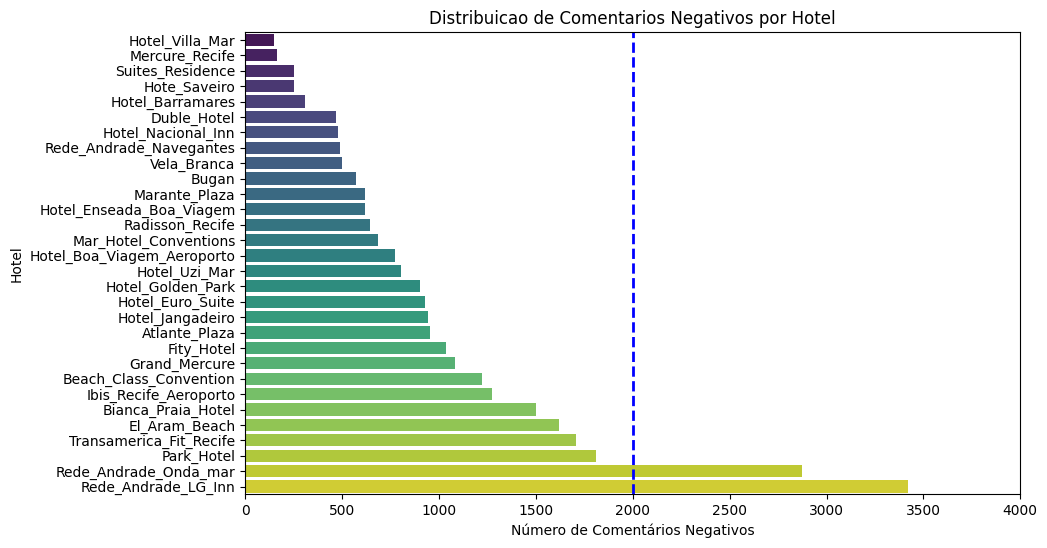

In [13]:
negativo_hotel = data.groupby('hotel')['comentario_negativo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=negativo_hotel, x='comentario_negativo', y='hotel', palette='viridis')
plt.title('Distribuicao de Comentarios Negativos por Hotel')
plt.xlim(0, 4000)
plt.axvline(x=2000, color='blue', linestyle='--', linewidth=2)
plt.xlabel('Número de Comentários Negativos')
plt.ylabel('Hotel')
plt.show()




# Analisando esse gráfico vemos que os mesmos 2 hoteis que tiveram mais comentarios POSITIVOS também tiveram mais comentarios NEGATIVOS
# o que isso significa?

# Comentário:
- Os mesmos hotéis que concentram muitos comentários positivos, também concentram negativos. Isso reforça a tese de que visibilidade atrai polarização.


In [14]:
#Filtros
notas_baixas = data[data['nota'] < 8]
notas_altas = data[data['nota'] >= 8]

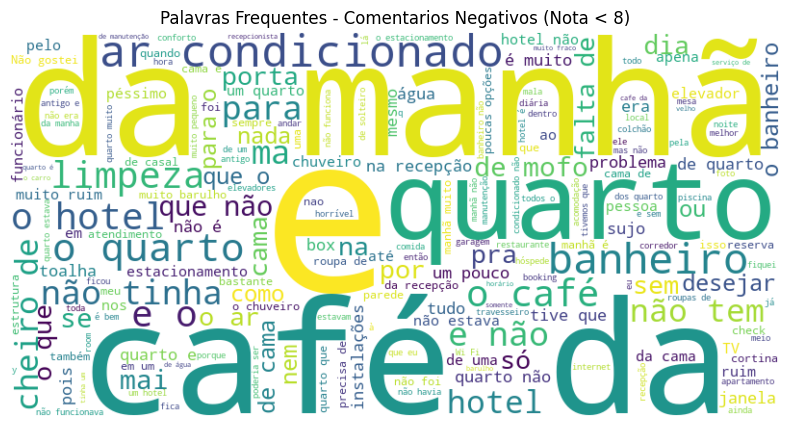

In [15]:
texto_negativo = ' '.join(notas_baixas['comentario_negativo'].dropna().astype(str))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(texto_negativo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Frequentes - Comentarios Negativos (Nota < 8)')
plt.show()

# Comentário:
- Problemas mais recorrentes envolvem: "quarto", "banheiro", "café da manhã", "ar-condicionado" — serviços essenciais.


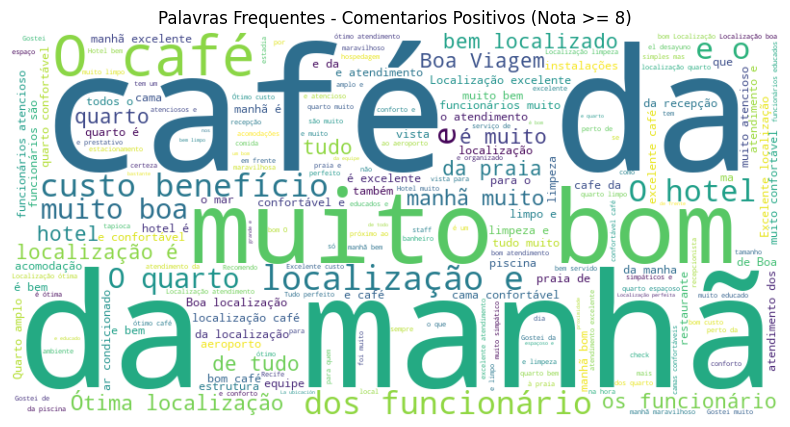

In [16]:
# Comentários positivos (notas altas)
texto_positivo = ' '.join(notas_altas['comentario_positivo'].dropna().astype(str))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_positivo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Frequentes - Comentarios Positivos (Nota >= 8)')
plt.show()

# Comentário:
- Os destaques são "localização", "funcionários", "custo-benefício", além do tradicional "café da manhã".


Correlacao entre nota media e quantidade de comentarios: 0.18



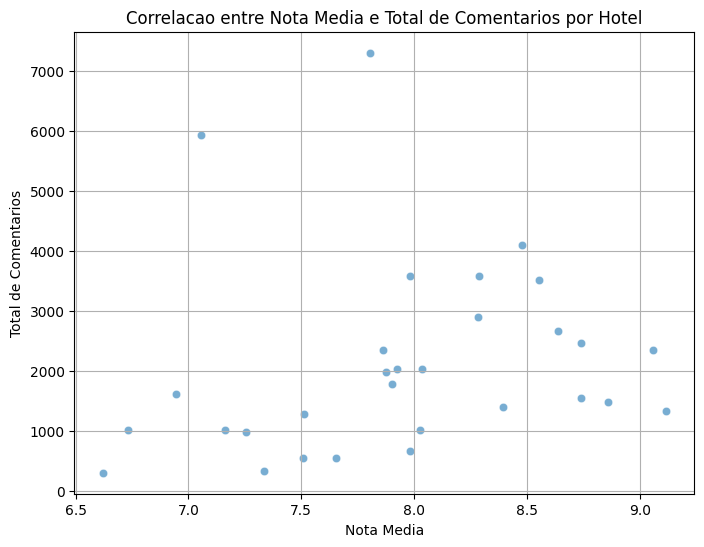

In [18]:
# Quantidade total de comentários por hotel
comentarios_totais = data.groupby('hotel')[['comentario_positivo', 'comentario_negativo']].count()
comentarios_totais['total_comentarios'] = comentarios_totais['comentario_positivo'] + comentarios_totais['comentario_negativo']
nota_media = data.groupby('hotel')['nota'].mean()
df_corr = comentarios_totais.join(nota_media)

# Calculo da correlacao
correlacao = df_corr[['nota', 'total_comentarios']].corr().iloc[0, 1]
print(f"Correlacao entre nota media e quantidade de comentarios: {correlacao:.2f}\n")

# Scatter plot com alpha
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='nota', y='total_comentarios', alpha=0.6)
plt.title('Correlacao entre Nota Media e Total de Comentarios por Hotel')
plt.xlabel('Nota Media')
plt.ylabel('Total de Comentarios')
plt.grid(True)
plt.show()


"Os hotéis que concentram o maior número de comentários positivos também aparecem entre os com mais comentários negativos, o que sugere maior visibilidade ou fluxo de hóspedes. Isso pode indicar maior exposição, variação na experiência dos hóspedes ou até mesmo mais tempo de operação."



# Comentário:
- Correlação positiva, mas fraca. Popularidade não garante qualidade.
- Algumas exceções (outliers) merecem investigação — hotéis com muitos comentários e nota baixa podem ter problemas estruturais recorrentes.


In [20]:
# Outliers com muitos comentários e notas baixas
outliers = df_corr[(df_corr['total_comentarios'] > 2000) & (df_corr['nota'] < 8)]
print("\nHotéis com muitos comentários e nota baixa (potenciais problemas estruturais):")
print(outliers)


Hotéis com muitos comentários e nota baixa (potenciais problemas estruturais):
                       comentario_positivo  comentario_negativo  \
hotel                                                             
El_Aram_Beach                         1966                 1619   
Grand_Mercure                         1256                 1085   
Hotel_Jangadeiro                      1089                  941   
Rede_Andrade_LG_Inn                   3886                 3419   
Rede_Andrade_Onda_mar                 3066                 2872   

                       total_comentarios      nota  
hotel                                               
El_Aram_Beach                       3585  7.981026  
Grand_Mercure                       2341  7.863181  
Hotel_Jangadeiro                    2030  7.922917  
Rede_Andrade_LG_Inn                 7305  7.803786  
Rede_Andrade_Onda_mar               5938  7.054579  
